# CS 109A/STAT 121A/AC 209A/CSCI E-109A

## Standard Section 3: Prediction using kNN and Regression Methods

**Harvard University**<br/>
**Fall 2017**<br/>
**Section Leaders: Nathaniel Burbank, Albert Wu, Matthew Holman <br/>**
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine** 

<center>**Download this notebook from the CS109 repo.**</center>

For this section, our goal is to get you familiarized with k-Nearest Neighbors, Linear, and Polynomial Regression. These methods find powerful applications in all walks of life and are centered around prediction. 


Specifically, we will: 
    
    1. Review some data selection basics
    2. Load in the iris dataset which is split into a training and testing dataset
    3. Do some basic exploratory analysis of the dataset and go through a scatterplot
    4. Write out the algorithm for kNN WITHOUT using the sklearn package
    5. Use the sklearn package to implement kNN and compare to the one we did by hand
    6. Extend the sklearn package to linear and polynomial regression 

For this section we will be using the following packages:

In [1]:
import sys
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Note --  Requires sklearn version .18 or higher  
from sklearn import metrics, datasets
from collections import Counter
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

assert(sys.version_info.major==3),print(sys.version)
# Python 3 or higher is required

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Review – Python list comprehensions 

In [2]:
# Makes a list of all the even numbers from 0 to 20 
# with a for loop
l = []
for i in range(20):
    if i%2 ==0:
        l.append(i)
l

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

### Makes a list of even numbers from 0 to 20 using a python list comprehension 

In [3]:
[i for i in range(20) if i%2 ==0]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

## Selecting by assigned index vs integer position 

In [4]:
data_url = 'https://raw.githubusercontent.com/nathanielburbank/CS109/master/data/states.csv'
states = pd.read_csv(data_url,index_col=0)
states.head()

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
Alabama,0,1250,9046,127901,309527,590756,771623,964201,996992,1262505,...,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,4447100,4779736
Alaska,0,0,0,0,0,0,0,0,0,0,...,55036,59278,72524,128643,226167,300382,401851,550043,626932,710231
Arizona,0,0,0,0,0,0,0,0,9658,40440,...,334162,435573,499261,749587,1302161,1770900,2718215,3665228,5130632,6392017
Arkansas,0,0,1062,14273,30388,97574,209897,435450,484471,802525,...,1752204,1854482,1949387,1909511,1786272,1923295,2286435,2350725,2673400,2915918
California,0,0,0,0,0,0,92597,379994,560247,864694,...,3426861,5677251,6907387,10586223,15717204,19953134,23667902,29760021,33871648,37253956


### Select just the columns from 1930 to 1960 

In [5]:
states[['1930','1940','1950','1960']].head()

,1930,1940,1950,1960
Alabama,2646248,2832961,3061743,3266740
Alaska,59278,72524,128643,226167
Arizona,435573,499261,749587,1302161
Arkansas,1854482,1949387,1909511,1786272
California,5677251,6907387,10586223,15717204


### Select just New York, New Jersey, and Connecticut 

In [6]:
tristate = ['New York','New Jersey','Connecticut']
states.loc[tristate]

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
New York,340120,586050,959049,1372812,1918608,2428921,3097394,3880735,4382759,5082871,...,10385227,12588066,13479142,14830192,16782304,18236967,17558072,17990455,18976457,19378102
New Jersey,184139,211149,245555,277575,320823,373306,489555,672035,906096,1131116,...,3155900,4041334,4160165,4835329,6066782,7168164,7364823,7730188,8414350,8791894
Connecticut,237946,251002,262042,275202,297675,309978,370792,460147,537454,622700,...,1380631,1606903,1709242,2007280,2535234,3031709,3107576,3287116,3405565,3574097


### Select just New York, New Jersey, and Connecticut from 1930 to 1970 

In [7]:
states.loc[['New York','New Jersey','Connecticut'],['1930','1940','1950','1960']]

,1930,1940,1950,1960
New York,12588066,13479142,14830192,16782304
New Jersey,4041334,4160165,4835329,6066782
Connecticut,1606903,1709242,2007280,2535234


### Select the states between Nevada and New York, from 1930 to 1960

In [8]:
states.loc['Nevada':'New York','1930':'1960']

,1930,1940,1950,1960
Nevada,91058,110247,160083,285278
New Hampshire,465293,491524,533242,606921
New Jersey,4041334,4160165,4835329,6066782
New Mexico,423317,531818,681187,951023
New York,12588066,13479142,14830192,16782304


### Select rows 10 to 15 *by positon*

In [9]:
states.iloc[10:15]

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
Georgia,82548,162686,251407,340989,516823,691392,906185,1057286,1184109,1542180,...,2895832,2908506,3123723,3444578,3943116,4589575,5463105,6478216,8186453,9687653
Hawaii,0,0,0,0,0,0,0,0,0,0,...,255912,368336,423330,499794,632772,768561,964691,1108229,1211537,1360301
Idaho,0,0,0,0,0,0,0,0,14999,32610,...,431866,445032,524873,588637,667191,712567,943935,1006749,1293953,1567582
Illinois,0,2458,12282,55211,157445,476183,851470,1711951,2539891,3077871,...,6485280,7630654,7897241,8712176,10081158,11113976,11426518,11430602,12419293,12830632
Indiana,0,2632,24520,147178,343031,685866,988416,1350428,1680637,1978301,...,2930390,3238503,3427796,3934224,4662498,5193669,5490224,5544159,6080485,6483802


### Select rows 10 to 15, and the last five columns (by position)

In [10]:
states.iloc[10:15,-5:]

,1970,1980,1990,2000,2010
Georgia,4589575,5463105,6478216,8186453,9687653
Hawaii,768561,964691,1108229,1211537,1360301
Idaho,712567,943935,1006749,1293953,1567582
Illinois,11113976,11426518,11430602,12419293,12830632
Indiana,5193669,5490224,5544159,6080485,6483802


## Load in the iris dataset and EDA:

The iris dataset can be found within the **sklearn** package and contains measurement data for three types of Iris' (a kind of flower): 1) Setosa, 2) Versicolour, and 3) Virginica. For each type of Iris, we have recorded the sepal length, sepal width, petal length, and petal width in centimeters. (The sepal can be basically thought of as the outer-most petal of a flower).  These four measurements were done on 50 unique Setosa, 50 unique Versicolour, and 50 unique Virginia flowers for a total of 150 unique flower measurements. 

In the dataset below, we will let the **target** variable designate the flower type by letting **0** represent Setosa, **1** represent Versicolour, and **2** represent Virginica. Now, we will load in the dataset:

In [11]:
# Load in the dataset, which is contained in the sklearn package
# Inital version of dataset is in dict-like container object
iris_bunch = datasets.load_iris()

# np.c_ is the numpy concatenate function which combines the data array and target array.
# The target array is our "Y" variable and the data array are the "X" variables. 
iris = pd.DataFrame(data= np.c_[iris_bunch['data'], iris_bunch ['target']],
                     columns= iris_bunch['feature_names'] + ['target'])

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


We can use the **describe()** function to summarize our dataset. When using the **describe()** function, some care should be taken to interpret the values based on what the data represent. For example, the **count** row shows we have 150 observations. The **target** column doesn't have too much interpretive value as the other columns as we are letting **0**, **1**, and **2** be **categorical** variables indicating which flower type was measured.


In [12]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can also use the groupby function to look at mean stats aggregated by flower type 

In [13]:
iris.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.006,3.418,1.464,0.244
1.0,5.936,2.770,4.260,1.326
2.0,6.588,2.974,5.552,2.026


In general, it is good practice to normalize data before proceeding. As such, we can create the following functions:

In [14]:
# Takes in a dataset and normalizes it. 
def normalize(x):
    num = x - np.min(x)
    denom = np.max(x) - np.min(x)
    return (num / denom)

iris.iloc[:, 0:4] = normalize(iris.iloc[:, 0:4])

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


Let's see what the describe function **AFTER** normalization:

In [15]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778,1.000000
std,0.230018,0.180664,0.299054,0.317984,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


We can also use the **pairplot()** function to create a scatterplot matrix of our data:

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


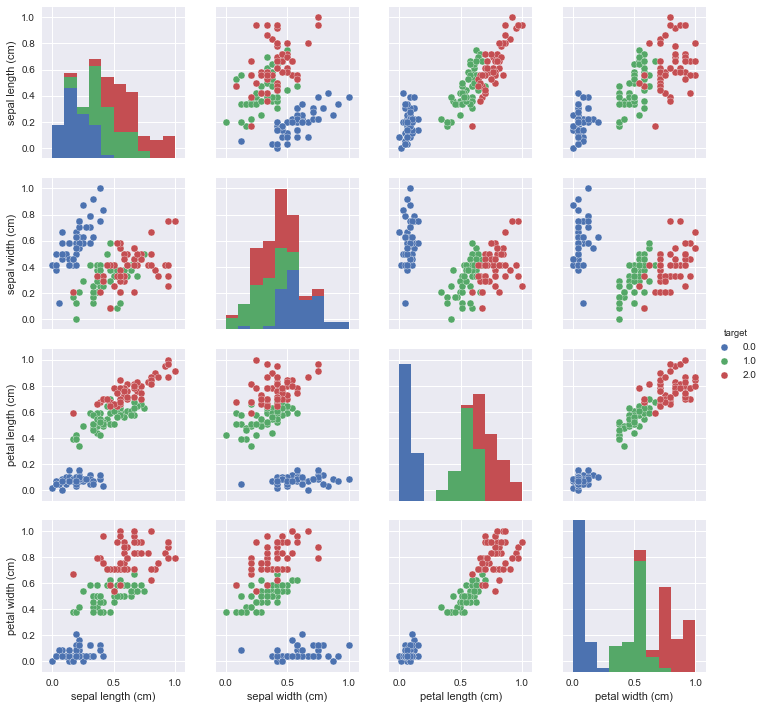

In [16]:
features_cols = iris.columns[:4]
sns.pairplot(data=iris,hue='target',vars=features_cols)

## Split up the data into a training set and a test set:

Now that we have an idea of what the data looks like, we would like to create a way to predict flower type (Setosa, Versicolour, or Virginica) based on our 4 predictor variables. Whatever method we use, it would be nice to have a way to assess how accurate our model is. Therefore, we will be breaking up the data into a **training** and a **testing** set. The **training** set will be used to train the model, while the **testing** set will be used to gauge how well our model does in general. The **testing** set is a way for us to ensure our model doesn't overfit our data.

Let us first create a function that will randomly split the data up into a 70-30 split, with 70% of the data going into the **testing** set:

In [17]:
def split_data(data, train_size=.7):
    # Determine the number of observations we have in our entire data set:
    length = len(data)
    # Create a list of integer indices ranging over our number of observations:
    indices = list(range(length))
    # Use numpy's random.shuffle() function to randomly shuffle over our index:
    np.random.shuffle(indices)
    
    # Create a list for the first 70% of the shuffled indices and set to training: 
    train_indices = indices[0:int(length * train_size)]
    # Create a list for the remaining 30% of the shuffled indices and set to testing:
    test_indices = indices[int(length * train_size):]
    
    # Use the list of training indices to find the corresponding data entries:
    train = data.iloc[train_indices]
    # Use the list of testing indices to find the corresponding data entries:
    test = data.iloc[test_indices]
    
    # Return two dataframes, one with the testing data and one with the training data:
    return train, test

We will now run the function and see if it returns actually what we want:

In [18]:
iris_train,iris_test  = split_data(iris)

# Return the dimensions of our training dataframe after using the split_data function:
iris_train.shape

(105, 5)

## Alternative approach using train_test_split from sklearn

In [19]:
train, test = train_test_split(iris, test_size=0.3)
train.shape

(105, 5)

## Implementing the kNN Algorithm by hand:

To really understand how the kNN algorithm works, it helps to go through the algorithm line by line in code.

In [20]:
def knn_algorithm(train, test, k):
    
    # Create any empty list to store our predictions in:
    predictions = []
    
    predictor_cols = [col for col in train.columns if col != 'target']
    
    # Separate the response and predictor variables from training and test set:
    train_x = train[predictor_cols]
    train_y = train['target']
    test_x  = test[predictor_cols]
    test_y  = test['target']
    
    for index, row in test_x.iterrows():

        # For each test point, store the distance between all training points and test point
        vec_distances = pd.DataFrame((train_x.values - row.values)**2, index=train.index, columns = train_x.columns)

        # Then, we sum across the columns per row to obtain the Euclidean distance squared
        distances = vec_distances.sum(axis = 1)
        
        # Sort the distances to training points (in ascending order) and take first k points
        nearest_k = distances.sort_values().iloc[:k]
        # For simplicity, we omitted the square rooting of the Euclidean distance because the
        # square root function preserves order. 
        
        # Take the mean of the y-values of training set corresponding to the nearest k points
        k_mean = train_y[nearest_k.index].mean()
        
        # Add on the mean to our predicted y-value list
        predictions.append(k_mean)
    
    # Create a dataframe with the x-values from test and predicted y-values  
    predict = test.copy()  
    predict['target'] = pd.Series(predictions, index=test.index)
    
    return predict

Now to run the algorithm on our dataset with $k = 5$:

In [21]:
k = 5
predicted_knn = knn_algorithm(iris_train, iris_test, k)
predicted_knn

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
127,0.500000,0.416667,0.661017,0.708333,1.8
71,0.500000,0.333333,0.508475,0.500000,1.0
118,0.944444,0.250000,1.000000,0.916667,2.0
122,0.944444,0.333333,0.966102,0.791667,2.0
9,0.166667,0.458333,0.084746,0.000000,0.0
109,0.805556,0.666667,0.864407,1.000000,2.0
135,0.944444,0.416667,0.864407,0.916667,2.0
42,0.027778,0.500000,0.050847,0.041667,0.0
67,0.416667,0.291667,0.525424,0.375000,1.0
31,0.305556,0.583333,0.084746,0.125000,0.0


We want to have a way to evaluate our predictions from the kNN algorithm with $k=5$. One way is to compute the $R^2$ coefficient. Let's create a function for that:

In [22]:
def evaluate(predicted, true):
    # Find the squared error:
    squared_error = (predicted['target'] - true['target'])**2
    
    # Finding the mean squared error:
    error_var = squared_error.sum()
    sample_var = ((true['target'] - true['target'].mean())**2).sum()
    
    r = (1 - (error_var / sample_var))
    
    return r

Then let's apply this function to our predictions:

In [23]:
evaluate(predicted_knn, iris_test)

0.96901004304160687

We see that the coefficient for the Nearest Neighbors implementation with $k=5$ is $R^2 = 0.9745$, which should more or less match what we get with the sklearn package. 

## Now using sklearn to implement kNN:

We will now use the **sklearn** package to implement kNN:

Here, we will split our data using the train_test_split function from sklearn.

In [24]:
# Now we can use sklearn's train_test_split function to split our data:
train, test =  train_test_split(iris, test_size=.3)

x_train, x_test = train[features_cols], test[features_cols]
y_train, y_test = train['target'], test['target']

Then, we can fit the model and use various metrics to assess our accuracy:

We can also introduce a Confusion Matrix:

In [25]:
# Set kNN parameter:
k = 10

# Now we can fit the model, predict our variable of interest, and then evaluate our fit:
# First, we create the classifier object:
neighbors = KNeighborsClassifier(n_neighbors=k)

# Then, we fit the model using x_train as training data and y_train as target values:
neighbors.fit(x_train, y_train)

# Retreieve our predictions:
prediction_knn = neighbors.predict(x_test)

# This returns the mean accuracy on the given test data and labels, or in other words, 
# the R squared value -- A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 1.
r = neighbors.score(x_test, y_test)
r


0.97777777777777775

In [26]:
expected_knn = y_test
predicted_knn = neighbors.predict(x_test)
print(metrics.classification_report(expected_knn, predicted_knn))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        12
        1.0       1.00      0.94      0.97        17
        2.0       0.94      1.00      0.97        16

avg / total       0.98      0.98      0.98        45



In [27]:
pd.DataFrame(metrics.confusion_matrix(expected_knn, predicted_knn))

,0,1,2
0,12,0,0
1,0,16,1
2,0,0,16


In the above, 4 flowers belonging to class 3 were mis-classified as class 2, while 2 flowers of class 2 were mis-classified as class 3. A confusion matrix allows us to view where our inaccurate predictions lie in a simple "snapshot" style matrix.

# Linear and Polynomial Regression

We just went over the kNN prediction method. Now, we will fit the same data, but onto linear and polynomial regressions.

## Linear Regression:

We will use the training/testing dataset as before and create our linear regression objects.

In [28]:
from statsmodels.api import OLS
# We must first create the linear regression object from sklearn:
regr = LinearRegression()
# Then, we will put in the training sets in for the .fit() function:
regr.fit(x_train, y_train)
# This prints the regression coefficients of our model:
print(regr.coef_)

[-0.30963917 -0.24697997  1.32772919  1.38804501]


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [29]:
import statsmodels.api as sm
# We must first create the linear regression object from stats model:
model = sm.OLS(y_train.values, x_train)
regr = model.fit()
# This prints the regression coefficients of our model:
regr.params

sepal length (cm)   -0.298224
sepal width (cm)    -0.272424
petal length (cm)    1.287064
petal width (cm)     1.408625
dtype: float64

Now, we will compute metrics that can be used to assess fit:

In [30]:
# To compute the mean squared error (notice that we are now using the TEST set):
np.mean((regr.predict(x_test)-y_test)**2)

0.044610368199549034

In [31]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     821.3
Date:                Mon, 25 Sep 2017   Prob (F-statistic):           4.65e-76
Time:                        14:07:00   Log-Likelihood:                 10.421
No. Observations:                 105   AIC:                            -12.84
Df Residuals:                     101   BIC:                            -2.225
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal length (cm)    -0.2982      0.252     -1.183      0.240      -0.798       0.202
sepal width (cm)     -0.2724      0.088     -3.091      0.003      -0.447      -0.098
petal length (cm)     1.2871      0.328      3.927      0.000       0.637       1.937
petal width (cm)      1.4086      0.261      5.388      0.000       0.890       1.927
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.212
Skew:                          -0.056   Prob(JB):                        0.900
Kurtosis:                       3.189   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Instead of focusing on $R^2$, let’s look at the classification stats..

In [32]:
predicted_knn = np.round(regr.predict(x_test))
print(metrics.classification_report(expected_knn, predicted_knn))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        12
        1.0       1.00      1.00      1.00        17
        2.0       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        45



In [33]:
pd.DataFrame(metrics.confusion_matrix(expected_knn, predicted_knn))

,0,1,2
0,12,0,0
1,0,17,0
2,0,0,16


## Polynomial Regression


Polynomial regression is useful when you suspect a non-linear relationship between the predictor variables $x$ and the conditional expectation of $y$. Specifically, it is a special case of linear regression where the predictor variables are modeled through an $n$th degree polynomial. In Python, we can create the polynomial features through scikit-learn's PolynomialFeatures package. Then, we can use linear regression to implement a polynomial regression model. 

We first need to create the PolynomialFeatures object and specify to what degree we wish to take our polynomial to:

In [34]:
# Create the PolynomialFeatures object and specify the number of degrees:
degree = 2
poly = PolynomialFeatures(degree)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
pd.DataFrame(x_train_poly).shape

(105, 15)

In [35]:
# Create a linear regression object
lg = LinearRegression()

# Fit our training data with polynomial features 
lg.fit(x_train_poly, y_train)

# Obtain coefficients
lg.coef_

array([ 0.        , -1.77794261,  0.5344574 ,  1.62004108,  1.60516847,
       -4.2616297 ,  6.20878203,  1.47849795,  3.41352618, -1.40556121,
       -2.37861104, -3.37263167,  2.83611552, -4.26639546,  1.66077366])

Now we can also do prediction:

In [36]:
# Predict from our fitted polynomial regression model based on our test set. 
poly.predicted = lg.predict(x_test_poly)
poly.predicted

array([  2.09577754e+00,   1.90835421e+00,   1.45185038e+00,
         2.03677712e+00,   1.68743917e+00,   8.34690888e-01,
         1.84906220e-03,   1.90112222e+00,   1.94927752e+00,
         1.69878469e+00,   9.44551906e-01,   1.11378354e+00,
         1.10591494e+00,   1.30116059e+00,   6.83559514e-02,
         9.71753452e-01,  -3.47377418e-03,  -3.93921073e-02,
         1.83211877e+00,   1.51806934e+00,   1.29025790e+00,
         8.81368762e-01,  -2.07134586e-01,   1.45026153e+00,
         3.39345674e-02,  -3.24850749e-02,   1.21017198e+00,
         2.67289192e-02,   1.23155033e+00,   1.63250726e+00,
         9.20497512e-01,   4.42060824e-02,   1.78149121e+00,
         1.58456258e-02,   1.11530451e+00,   1.61879224e+00,
         1.87089563e+00,   1.17073907e+00,   1.65674335e+00,
        -1.03710559e-01,  -2.31597971e-02,   1.89068541e+00,
         9.62671357e-01,   9.55948793e-01,   1.22783302e+00])

In [37]:
# Computer the Mean Squared Error for Polynomial Regression:
np.mean((poly.predicted-y_test)**2)

0.043769968318254686

In [38]:
predicted_knn = np.round(poly.predicted)
print(metrics.classification_report(expected_knn, predicted_knn))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        12
        1.0       0.94      1.00      0.97        17
        2.0       1.00      0.94      0.97        16

avg / total       0.98      0.98      0.98        45



In [39]:
pd.DataFrame(metrics.confusion_matrix(expected_knn, predicted_knn))

,0,1,2
0,12,0,0
1,0,17,0
2,0,1,15
